In [1]:
%load_ext lab_black

## Additional Exercises V -  Regression & Correlation


In [2]:
# First, let's import all the needed libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")

### Data set Import & Processsing

In [3]:
import requests, zipfile, io

url = "http://userpage.fu-berlin.de/soga/soga-py/300/307000_time_series/tageswerte_KL_00403_19500101_20211231_hist.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract("produkt_klima_tag_19500101_20211231_00403.txt", "../data")
data_raw = pd.read_csv(
    "../data/produkt_klima_tag_19500101_20211231_00403.txt",
    sep=";",
    na_values=["-999"],
    skipinitialspace=True,
)
data_raw

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,403,19500101,NaN,NaN,NaN,5,2.2,7,NaN,0.0,5.0,4.0,1025.60,-3.2,83.00,-1.1,-4.9,-6.3,eor
1,403,19500102,NaN,NaN,NaN,5,12.6,8,NaN,0.0,8.0,6.1,1005.60,1.0,95.00,2.2,-3.7,-5.3,eor
2,403,19500103,NaN,NaN,NaN,5,0.5,1,NaN,0.0,5.0,6.5,996.60,2.8,86.00,3.9,1.7,-1.4,eor
3,403,19500104,NaN,NaN,NaN,5,0.5,7,NaN,0.0,7.7,5.2,999.50,-0.1,85.00,2.1,-0.9,-2.3,eor
4,403,19500105,NaN,NaN,NaN,5,10.3,7,NaN,0.0,8.0,4.0,1001.10,-2.8,79.00,-0.9,-3.3,-5.2,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,403,20211227,NaN,NaN,NaN,3,0.0,8,0.183,0.0,5.9,3.8,998.13,-3.7,79.67,-0.7,-7.9,-9.9,eor
26294,403,20211228,NaN,NaN,NaN,3,1.5,6,0.000,0.0,6.4,5.3,990.17,-0.5,88.46,2.7,-3.9,-5.1,eor
26295,403,20211229,NaN,NaN,NaN,3,0.3,6,0.000,0.0,7.5,8.2,994.40,4.0,100.00,5.6,1.8,0.0,eor
26296,403,20211230,NaN,NaN,NaN,3,3.2,6,0.000,0.0,7.9,11.5,1001.70,9.0,98.54,12.7,4.6,2.3,eor


In [4]:
# Remove unnecessary columns
### By looking at the data and consulting the variable description,
### we can immediately find variables that are not useful for our purpose and drop them.

df = data_raw.drop(
    columns=[
        "STATIONS_ID",
        "MESS_DATUM",
        "QN_3",
        "FX",
        "FM",
        "NM",
        "eor",
        "QN_4",
        "RSK",
        "RSKF",
        "SHK_TAG",
        "SDK",
        "UPM",
        "VPM",
    ]
)
## rename for convenience:

df = df.rename(
    columns={
        "PM": "pres",
        "TMK": "temp",
        "TXK": "temp_max",
        "TNK": "temp_min",
        "TGK": "temp_sfc",
    }
)
df

,pres,temp,temp_max,temp_min,temp_sfc
0,1025.60,-3.2,-1.1,-4.9,-6.3
1,1005.60,1.0,2.2,-3.7,-5.3
2,996.60,2.8,3.9,1.7,-1.4
3,999.50,-0.1,2.1,-0.9,-2.3
4,1001.10,-2.8,-0.9,-3.3,-5.2
...,...,...,...,...,...
26293,998.13,-3.7,-0.7,-7.9,-9.9
26294,990.17,-0.5,2.7,-3.9,-5.1
26295,994.40,4.0,5.6,1.8,0.0
26296,1001.70,9.0,12.7,4.6,2.3


In [5]:
### Drop missing data
## As a next step, we check the data for missing values.
df.isnull().sum()

pres        0
temp        0
temp_max    0
temp_min    0
temp_sfc    8
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)
df

,pres,temp,temp_max,temp_min,temp_sfc
0,1025.60,-3.2,-1.1,-4.9,-6.3
1,1005.60,1.0,2.2,-3.7,-5.3
2,996.60,2.8,3.9,1.7,-1.4
3,999.50,-0.1,2.1,-0.9,-2.3
4,1001.10,-2.8,-0.9,-3.3,-5.2
...,...,...,...,...,...
26293,998.13,-3.7,-0.7,-7.9,-9.9
26294,990.17,-0.5,2.7,-3.9,-5.1
26295,994.40,4.0,5.6,1.8,0.0
26296,1001.70,9.0,12.7,4.6,2.3


### Exercise 1: Feature scaling
 
In the next steps it is exaplained how to transform the data to make the different variables (feature) comparable with each other **min-max scaling** and **logistic transformation** which transforms e.g. skew-symmetric data to a normally distributed data set.
We comment the code, because our data is normally distributed. But you need it later for dealing with different data. 

#####  Min-Max scaling

The min-max scaling

$$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$$


transforms the data into the range $[0,1]$. We want to avoid getting values with 0, because in the second step we need the logarithm of the values. Therefore, we use slightly larger boundary values $x_{min}-1$ and $x_{max}+1$. Thus

$$x'=\frac{x-x_{min}+1}{x_{max}-x_{min}+2\, .}$$

##### Logistic transformation

As a second step, we use a logistic transformation
$$x''=\log\frac{x'}{1-x'}$$

However, before we can start the transformation, we face a problem! Because we have transformed the test set with the values of the training set, the test set may contain values outside the range [0,1]. This will not work with the logarithm in the transformation.

##### Back transformation

The back transformation is the “logistic” function resp. inverse logit:

\begin{align}
x''\to x'=\frac{e^{x''}}{1+e^{x''}}&& and &&
x'\to x=(x'+l)\cdot(u-l)
\end{align}

\begin{align}
&& resp. && 
x'\to x= ({x'+x_{min}+1})\cdot(x_{max}-x_{min}+2)
\end{align}


#### Exercise A
>
> Write function (`def ():...`) that log transforms your data including a prior Min-Max-Scaling. This way we can generalise our approach well to new unseen data! (e.g. call it `logistic_min_max()` function). 

#### Exercise B
>
> The same way provide a function that back transformations this “logistic” function, resp. inverse logit! (call it `inv_logit()` function)

In [7]:
### your code here ###

#### solution

In [8]:
## A.


def min_max(variable):
    xmin, xmax = variable.min(), variable.max()
    min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
    return xmin, xmax, min_max_done


# df_transfo[transform_cols] = (df_transfo[transform_cols] - xmin + 1) / (xmax - xmin + 2)

test = np.arange(0, 100, 1)
xmin, xmax, min_max_variable = min_max(test)

In [9]:
def log_transform(min_max_variable):
    return np.log(min_max_variable / (1 - min_max_variable))


log_transform(min_max_variable)

array([-4.60517019, -3.90197267, -3.48635519, -3.18841662, -2.95491028,
       -2.76211742, -2.59738463, -2.45315795, -2.324564  , -2.20827441,
       -2.1019144 , -2.00372972, -1.91238746, -1.82685079, -1.7462971 ,
       -1.67006253, -1.59760345, -1.52846885, -1.46228027, -1.39871688,
       -1.3375042 , -1.2784054 , -1.22121461, -1.16575159, -1.11185752,
       -1.05939158, -1.00822823, -0.95825493, -0.90937029, -0.8614825 ,
       -0.81450804, -0.7683706 , -0.72300014, -0.67833209, -0.63430668,
       -0.59086833, -0.54796517, -0.50554857, -0.46357274, -0.42199441,
       -0.3807725 , -0.33986783, -0.29924289, -0.25886163, -0.2186892 ,
       -0.17869179, -0.13883644, -0.0990909 , -0.05942342, -0.01980263,
        0.01980263,  0.05942342,  0.0990909 ,  0.13883644,  0.17869179,
        0.2186892 ,  0.25886163,  0.29924289,  0.33986783,  0.3807725 ,
        0.42199441,  0.46357274,  0.50554857,  0.54796517,  0.59086833,
        0.63430668,  0.67833209,  0.72300014,  0.7683706 ,  0.81

In [10]:
## B.


# backtransform
## reverse min max und perform exp()
def inv_logit(xmin, xmax, logit_transf_variable):
    return (xmin - 1) + (xmax - xmin + 2) * np.exp(logit_transf_variable) / (
        1 + np.exp(logit_transf_variable)
    )


inv_logit(xmin, xmax, log_transform(min_max_variable))

array([4.4408921e-16, 1.0000000e+00, 2.0000000e+00, 3.0000000e+00,
       4.0000000e+00, 5.0000000e+00, 6.0000000e+00, 7.0000000e+00,
       8.0000000e+00, 9.0000000e+00, 1.0000000e+01, 1.1000000e+01,
       1.2000000e+01, 1.3000000e+01, 1.4000000e+01, 1.5000000e+01,
       1.6000000e+01, 1.7000000e+01, 1.8000000e+01, 1.9000000e+01,
       2.0000000e+01, 2.1000000e+01, 2.2000000e+01, 2.3000000e+01,
       2.4000000e+01, 2.5000000e+01, 2.6000000e+01, 2.7000000e+01,
       2.8000000e+01, 2.9000000e+01, 3.0000000e+01, 3.1000000e+01,
       3.2000000e+01, 3.3000000e+01, 3.4000000e+01, 3.5000000e+01,
       3.6000000e+01, 3.7000000e+01, 3.8000000e+01, 3.9000000e+01,
       4.0000000e+01, 4.1000000e+01, 4.2000000e+01, 4.3000000e+01,
       4.4000000e+01, 4.5000000e+01, 4.6000000e+01, 4.7000000e+01,
       4.8000000e+01, 4.9000000e+01, 5.0000000e+01, 5.1000000e+01,
       5.2000000e+01, 5.3000000e+01, 5.4000000e+01, 5.5000000e+01,
       5.6000000e+01, 5.7000000e+01, 5.8000000e+01, 5.9000000e

In [11]:
### log tranform your variable

df_transfo = df.copy()
transform_cols = [
    "temp",
    "temp_max",
    "temp_min",
    "temp_sfc",
]  # ["COLUMN NAME", "COLUMN NAME"]

xmin, xmax, df_transfo[transform_cols] = min_max(df_transfo[transform_cols])

df_transfo[transform_cols] = log_transform(df_transfo[transform_cols])

## calculate mean & median tranform back:
inv_logit(xmin, xmax, df_transfo[transform_cols].mean()), inv_logit(
    xmin, xmax, df_transfo[transform_cols].median()
)

(temp         9.767871
 temp_max    13.886515
 temp_min     5.842247
 temp_sfc     4.349503
 dtype: float64,
 temp         9.5
 temp_max    13.6
 temp_min     5.5
 temp_sfc     3.7
 dtype: float64)

In [12]:
# do each column by hand ....
stats.pearsonr(df["temp_min"], df["temp_max"])

# or easily use the .corr() function of the entire df:

df.corr(method="pearson")

,pres,temp,temp_max,temp_min,temp_sfc
pres,1.000000,-0.069212,-0.042117,-0.123350,-0.125634
temp,-0.069212,1.000000,0.981847,0.952269,0.902622
temp_max,-0.042117,0.981847,1.000000,0.908394,0.852836
temp_min,-0.123350,0.952269,0.908394,1.000000,0.975749
temp_sfc,-0.125634,0.902622,0.852836,0.975749,1.000000


### Exercise 2: Correlation Plots

Create a correlation plot for the original data (df) and one for the transformed data (df_transfo). Both should be displayed in one figure but 1 subplot each.  Are there differences between the two plots? Which variables are no longer or more strongly correlated? How can these differences be explained? 

In [13]:
### your code here ###

##### solution

In [14]:
df.corr()

,pres,temp,temp_max,temp_min,temp_sfc
pres,1.000000,-0.069212,-0.042117,-0.123350,-0.125634
temp,-0.069212,1.000000,0.981847,0.952269,0.902622
temp_max,-0.042117,0.981847,1.000000,0.908394,0.852836
temp_min,-0.123350,0.952269,0.908394,1.000000,0.975749
temp_sfc,-0.125634,0.902622,0.852836,0.975749,1.000000


In [15]:
df_transfo.corr()

,pres,temp,temp_max,temp_min,temp_sfc
pres,1.000000,-0.066808,-0.042975,-0.118797,-0.116435
temp,-0.066808,1.000000,0.980614,0.945663,0.891206
temp_max,-0.042975,0.980614,1.000000,0.901528,0.842826
temp_min,-0.118797,0.945663,0.901528,1.000000,0.972604
temp_sfc,-0.116435,0.891206,0.842826,0.972604,1.000000


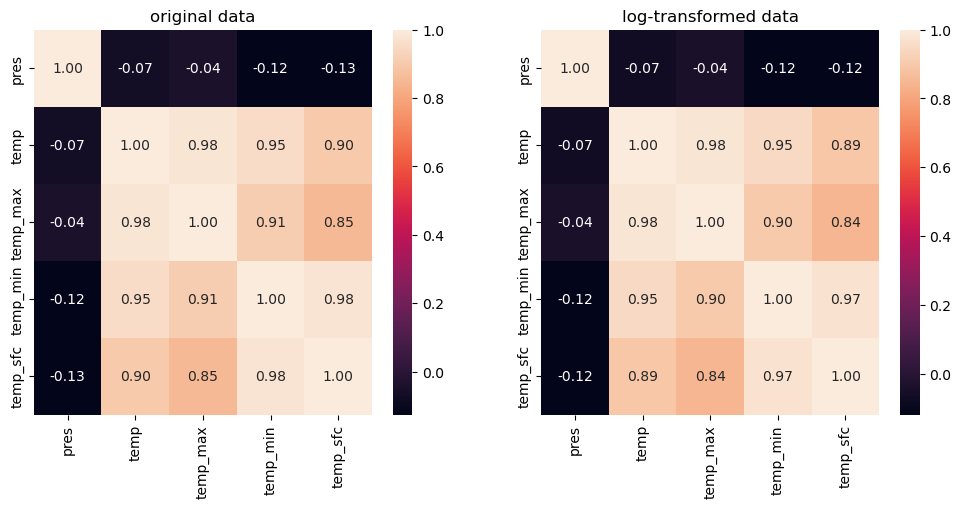

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax[0])
sns.heatmap(df_transfo.corr(), annot=True, fmt=".2f", ax=ax[1])

ax[0].set_title("original data")
ax[1].set_title("log-transformed data")
plt.show()


### Exercise 3: Correlation Coeffcicients
> Calculate the correlation coefficient matrix of the original, not-transformed mateorological data set using the Spearman-rank-coefficient.

In [17]:
### your code here ###

### Exercise 4: Recall
>1. How are the Pearson correlation coefficient and the Spearman rank correlation coefficient defined? 
>2. Both corrrelations have values between -1 and 1. In which case is the coefficient negative? 
>3. Sketch an example (by hand), where the Pearson Correlation Coefficient is larger than the Spearman rank correlation!



In [18]:
### your code here ###

### Exercise 5: Correlation Coefficients, an Example**
>
> In einem Einzugsgebiet im Süden Brandenburgs wurden an einer Grundwassermessstelle an verschiedenen Tagen der Abfluss (Q), die elektrische Leitfähigkeit (LF) und die Konzentrationen verschiedener chemischer Stoffe wie Sulfat (SO4), Calcium (CA) und Magnesium (MG) gemessen.  Es ist bekannt, dass in dem Gebiet früher Braunkohle abgebaut wurde und das im Boden enthaltene Pyrit (Eisendisulfid, FeS2) dem Luftsauerstoff ausgesetzt ist und oxidiert. Dabei können erhebliche Mengen an Säure, Eisen (Fe3+) und Sulfat entstehen, die die Trinkwasserqualität gefährden. Im Gebiet befinden sich auch landwirtschaftlich genutzte Flächen. Durch verschiedene Düngemittel, die schwefelhaltige Verbindungen mit Phosphor (PO43-) oder Nitrat (NO3), kann auch hier das Grundwasser durch Sulfat belastet sein. 
>
> **Interpretieren Sie die Korrelationsmatrix aus Sicht des Grundwasserschutzes!  Entscheide, ob das Grundwasser durch den ehemaligen Braunkohleabbau oder durch die Landwirtschaft belastet ist.**
>


|         | Q     | LF    | NO3   | SO4  | Ca   | Mg  | PO4 2-  | Fe3+ |
|---------|-------|-------|-------|------|------|-----|---------|------|
| Q       | 1     |       |       |      |      |     |         |      |
| LF      | -0,87 | 1     |       |      |      |     |         |      |
| NO3     | 0,61  | -0,84 | 1     |      |      |     |         |      |
| SO4     | -0,74 | 0,88  | -0,36 | 1    |      |     |         |      |
| Ca      | -0,56 | 0,73  | -0,67 | 0,69 | 1    |     |         |      |
| Mg      | -0,44 | 0,7   | -0,62 | 0,62 | 0,38 | 1   |         |      |
| PO4 2-  | -0,7  | 0,81  | 0,86  | 0,31 | 0,76 |   0,71  | 1       |      |
| Fe3+    | -0,65 | 0,77  | -0,76 | 0,84 | 0,71 | 0,7 | -0,81   | 1    |

*(inspired by Möller 2002)*

#### solution 7


|         | Q     | LF    | NO3   | SO4  | Ca   | Mg  | PO4 2-  | Fe3+ |
|---------|-------|-------|-------|------|------|-----|---------|------|
| Q       | 1     |       |       |      |      |     |         |      |
| LF      | -0,87 | 1     |       |      |      |     |         |      |
| NO3     | 0,61  | -0,84 | 1     |      |      |     |         |      |
| SO4     | -0,74 | 0,88  | **-0,36** | 1    |      |     |         |      |
| Ca      | -0,56 | 0,73  | -0,67 | 0,69 | 1    |     |         |      |
| Mg      | -0,44 | 0,7   | -0,62 | 0,62 | 0,38 | 1   |         |      |
| PO4 2-  | -0,7  | 0,81  | 0,86  | **0,31** | 0,76 |  0,71   | 1       |      |
| Fe3+    | -0,65 | 0,77  | -0,76 | **0,84** | 0,71 | 0,7 | -0,81   | 1    |

> ehemaliger Braunkohleabbau (Fe3+, SO4 2-) oder die Landwirtschaft (PO43-, NO3, SO4 2-) ?
> Korrelation zwischen Fe3+ und SO4 am höchsten --> also vermutlich verlaufen die Fließpfade durch ehem. Braunkohleabbaugebiete oder werden durch diese beeinfliusst.

### Exercise 6: Tree Line Regression

> Where is the tree line (Baumgrenze) in the Alps, for example? Let's take a look at this, admittedly somewhat artificial, data set. We have collected annual precipitation data at 7 different climate stations and now want to determine the relationship between precipitation (mm/a) and the tree line. For the majority of native tree species, an annual precipitation of 400 mm is required.
> 
> **A**: Plot elevation against precipitation and calculate the correlation coefficient according to spearman and pearson. Do they differ? Which is more suitable here and why?
>
> **B**: Which linear regression model is the best estimate for our data? Create a linear model with sklearn LinearRegression and evaluate it (R2). At what height are no more trees to be expected? Is a Linear regression suitbale here ? What could be an easy solution to better predict our data and build a better model?
>
> Additonal **C**: Build the same model again but apply a log-transformation to our data. Can you improve R2? Can we make a better prediction?



In [19]:
elev_NN = np.array([300, 500, 840, 1160, 1830, 2100, 2400])  # m a. s.l.
precip = np.array([1800, 1250, 700, 510, 410, 310, 230])  # mm/a

#### solution 8 A

-1.0
-0.88453400089943


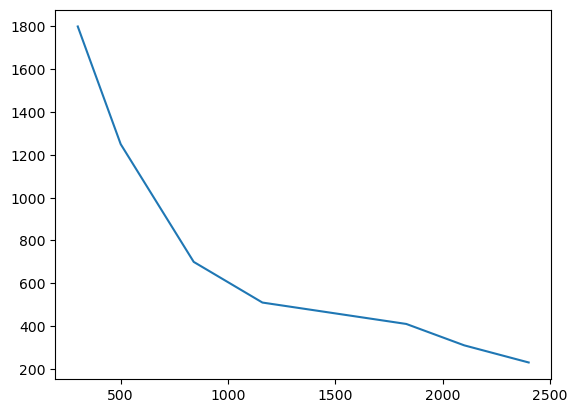

In [20]:
plt.plot(elev_NN, precip)

corr = stats.spearmanr(elev_NN, precip)[0]
print(corr)
corr = stats.pearsonr(elev_NN, precip)[0]
print(corr)

#### solution 8B

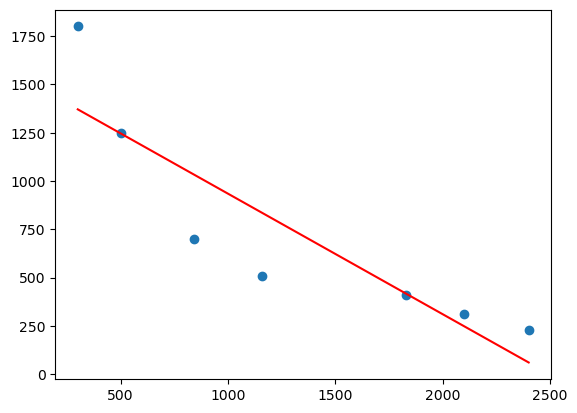

In [21]:
x = elev_NN
y = precip

# we have to reshape the regressors
x = x.reshape((-1, 1))

# set up the linear model
model = LinearRegression()

# find the linear function that fits the min/max temperature best:
model.fit(x, y)

## Now, we can easily plot using the 2 coefficients: m*x +n -->
plt.scatter(x, y)
plt.plot(x, model.coef_ * x + model.intercept_, color="red")

In [22]:
## predict from y to x--> input is precip

## transform the input with min max and log as well
sample = np.array([400])


# max temp:
x_pred = (sample - model.intercept_) / model.coef_

print(x_pred)

# inv_logit(logit_transf_variable = x_pred, xmin = elev_min, xmax = elev_max)

[1855.98180986]


In [23]:
### predict from x to y
baumgrenze = np.array([0])
baumgrenze = baumgrenze.reshape((-1, 1))

y_pred = model.predict(baumgrenze)

print(y_pred)

[1558.2246607]


In [24]:
### evaluate

r_sq = model.score(x, y)

print("coefficient of determination:", r_sq)

coefficient of determination: 0.7824003987471526


#### solution Additonal 8C - log

In [25]:
## extent the min-max function

## A.


def min_max(variable, xmin=None, xmax=None):
    if (xmin != None) & (xmax == None):  ## no we are able to set xmin manually
        xmax = variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    elif (xmin != None) & (
        xmax != None
    ):  ## no we are able to set xmin and xmax manually
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    else:
        xmin, xmax = variable.min(), variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
    return xmin, xmax, min_max_done

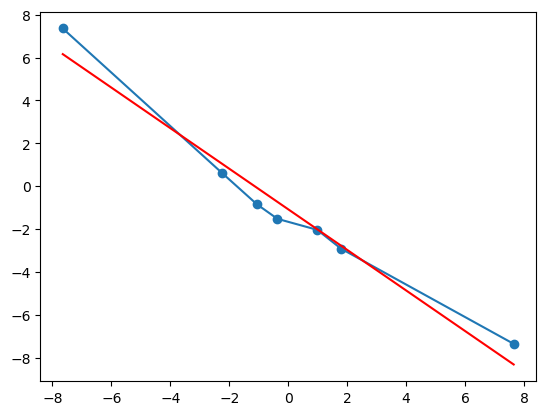

In [26]:
## logtransfrom

elev_min, elev_max, elev_min_max = min_max(elev_NN)
elev_log = log_transform(elev_min_max)

precip_min, precip_max, precip_min_max = min_max(precip)
precip_log = log_transform(precip_min_max)

# elev_min, precip_min = 0

plt.plot(elev_log, precip_log)

x = elev_log
y = precip_log

# we have to reshape the regressors
x = x.reshape((-1, 1))

# set up the linear model
model = LinearRegression()

# find the linear function that fits the min/max temperature best:
model.fit(x, y)

## Now, we can easily plot using the 2 coefficients: m*x +n -->
plt.scatter(x, y)
plt.plot(x, model.coef_ * x + model.intercept_, color="red")

In [27]:
### evaluate

r_sq = model.score(x, y)

print("coefficient of determination:", r_sq)

coefficient of determination: 0.9678937802675692


In [28]:
## predict x from y --> input is precip

## transform the input with min max and log as well
sample = np.array([400])
_, _, sample_min_max = min_max(sample, xmin=precip_min, xmax=precip_max)
sample_log = log_transform(sample_min_max)


# max temp:
x_pred = (sample_log - model.intercept_) / model.coef_

print(x_pred)

inv_logit(logit_transf_variable=x_pred, xmin=elev_min, xmax=elev_max)

[1.0812614]


array([1868.63196235])

In [29]:
## predict y from x --> input is elev

sample = np.array([1800])  #
_, _, sample_min_max = min_max(sample, xmin=elev_min, xmax=elev_max)
sample_log = log_transform(sample_min_max)


# max temp:
y_pred = model.intercept_ + model.coef_ * sample_log
print(y_pred)

inv_logit(logit_transf_variable=y_pred, xmin=precip_min, xmax=precip_max)

[-1.94616697]


array([425.45584633])

In [30]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_Marie.html",
    width=900,
    height=200,
)